In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from utils import *

In [3]:
plt.rcParams['figure.figsize'] = (14,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 22}
plt.rc('font', **font)

In [4]:
df = pd.read_csv('dataset.csv')

In [5]:
df

,filename,width,height,class,bboxes,total_bolts
0,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[316, 319, 511, 519]]",1
1,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[3535, 2440, 3740, 2639]]",1
2,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[3530, 329, 3725, 524]]",1
3,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,1512,2016,Bolt,"[[1286, 1244, 1383, 1344], [218, 123, 315, 223...",1
4,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[292, 2510, 491, 2704]]",1
...,...,...,...,...,...,...
179,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[346, 2465, 546, 2659]]",1
180,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[3520, 2435, 3720, 2629]]",1
181,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[3540, 414, 3745, 608], [3560, 1711, 3755, 19...",1
182,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[1429, 419, 1629, 613], [331, 1092, 536, 1297...",1


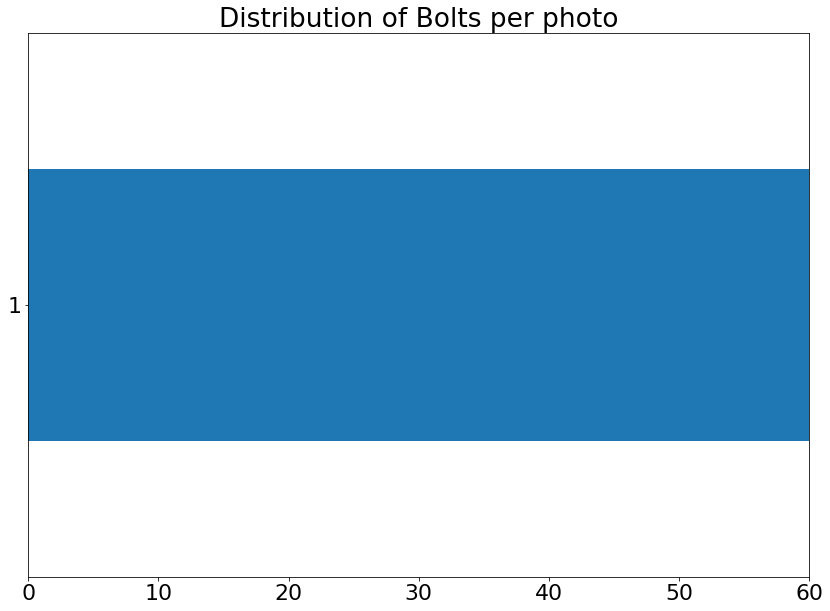

In [6]:
df.total_bolts.value_counts().plot(kind='barh')
plt.title('Distribution of Bolts per photo')
plt.xlim(0,60)
plt.show()

In [7]:
df['fold'] = -1

In [8]:
df

,filename,width,height,class,bboxes,total_bolts,fold
0,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[316, 319, 511, 519]]",1,-1
1,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[3535, 2440, 3740, 2639]]",1,-1
2,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[3530, 329, 3725, 524]]",1,-1
3,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,1512,2016,Bolt,"[[1286, 1244, 1383, 1344], [218, 123, 315, 223...",1,-1
4,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[292, 2510, 491, 2704]]",1,-1
...,...,...,...,...,...,...,...
179,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[346, 2465, 546, 2659]]",1,-1
180,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[3520, 2435, 3720, 2629]]",1,-1
181,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[3540, 414, 3745, 608], [3560, 1711, 3755, 19...",1,-1
182,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[1429, 419, 1629, 613], [331, 1092, 536, 1297...",1,-1


In [9]:
skf = StratifiedKFold(n_splits=5)

In [10]:
for fold_number, (train_index, val_index) in enumerate(skf.split(X=df['filename'], y=df['total_bolts'])):
    df.loc[df.iloc[val_index].index, 'fold'] = fold_number

In [11]:
df.fold.value_counts()

3    37
2    37
1    37
0    37
4    36
Name: fold, dtype: int64

In [12]:
df

,filename,width,height,class,bboxes,total_bolts,fold
0,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[316, 319, 511, 519]]",1,0
1,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[3535, 2440, 3740, 2639]]",1,0
2,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[3530, 329, 3725, 524]]",1,0
3,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,1512,2016,Bolt,"[[1286, 1244, 1383, 1344], [218, 123, 315, 223...",1,0
4,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[292, 2510, 491, 2704]]",1,0
...,...,...,...,...,...,...,...
179,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[346, 2465, 546, 2659]]",1,4
180,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[3520, 2435, 3720, 2629]]",1,4
181,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[3540, 414, 3745, 608], [3560, 1711, 3755, 19...",1,4
182,/home/astamoulakatos/OneDrive_1_1-20-2022/imag...,4032,3024,Bolt,"[[1429, 419, 1629, 613], [331, 1092, 536, 1297...",1,4


In [13]:
df.to_csv('dataset_strat.csv', index=False)